# 규제 선형 모델(Regularized Linear Models)

## 규제 선형 모델의 개요

: 회귀모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어

**선형 모델의 RSS 최소화하는 비용함수의 한계점**
- 학습 데이터에 지나치게 맞추게 되고 회귀계수가 쉽게 커짐
- 테스트 데이터세트에서 예측성능이 저하되기 쉬움

- 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화와 과적합을 방지하기 위해 회귀계수값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함

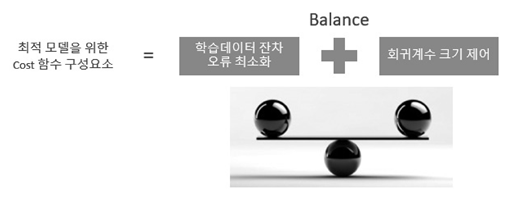

$ 비용함수목표 = Min(RSS(W)) + alpha*||W||_2^2 $

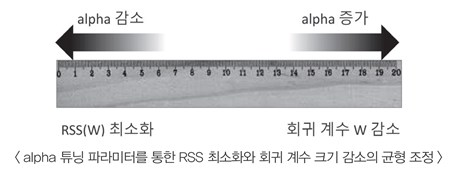

## 릿지회귀(Ridge Regression)

- L2 Norm Reqularization

https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

### 릿지 회귀의 특징
- 변수 간 상관관계가 높은 상황(다중공선성)에서 좋은 예측 성능
- 회귀계수의 크기가 큰 변수를 우선적으로 줄이는 경향이 있음
- 변수 선택 불가능
- 제약범위가 원의 형태

### 사이킷런에서 릿지회귀 클래스 `Rdige`

In [16]:
# 보스톤 주택가격 데이터 세트 이용
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# boston 데이타셋 로드
boston = load_boston()

X = boston.data
y = boston.target

# boston 데이타셋 DataFrame 변환 
# boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
# y = boston_df['PRICE'] = boston.target

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
# y = boston_df['PRICE']
# X = boston_df.drop('PRICE', axis=1)

# 릿지회귀로 예측하고, 예측 성능을 cross_cal_score() 평가
ridge = Ridge(alpha = 10)

neg_mse = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
mse = -1 * neg_mse
rmse = np.sqrt(mse)
avg_mse = np.mean(mse)
avg_rmse = np.mean(rmse)

print('5 folds: 개별 MSE', np.round(mse, 3))
print('5 folds: 개별 RMSE', np.round(rmse, 3))
print('평균 MSE : {0:.3f}, 평균 RMSE : {1:.3f}'.format(avg_mse, avg_rmse))

5 folds: 개별 MSE [11.422 24.294 28.144 74.599 28.517]
5 folds: 개별 RMSE [3.38  4.929 5.305 8.637 5.34 ]
평균 MSE : 33.395, 평균 RMSE : 5.518


=> 규제가 없는 LinearRegression의 RMSE 평균 5.829보다 더 작은 값으로 더 좋은 성능을 보여줌

**Ridge에서 alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정**

In [18]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 iteration 하면서 alpha에 따른 평균 rmse 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = -1 * neg_mse
    rmse = np.sqrt(mse)
    avg_mse = np.mean(mse)
    avg_rmse = np.mean(rmse)

    print('alpha: {0:.1f}, 평균 MSE: {0:.3f}, 평균 RMSE: {1:.3f}'.format(alpha, avg_mse, avg_rmse))

alpha: 0.0, 평균 MSE: 0.000, 평균 RMSE: 37.132
alpha: 0.1, 평균 MSE: 0.100, 평균 RMSE: 36.707
alpha: 1.0, 평균 MSE: 1.000, 평균 RMSE: 35.267
alpha: 10.0, 평균 MSE: 10.000, 평균 RMSE: 33.395
alpha: 100.0, 평균 MSE: 100.000, 평균 RMSE: 29.906


**각 alpha에 따른 회귀 계수 값을 시각화**
- 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

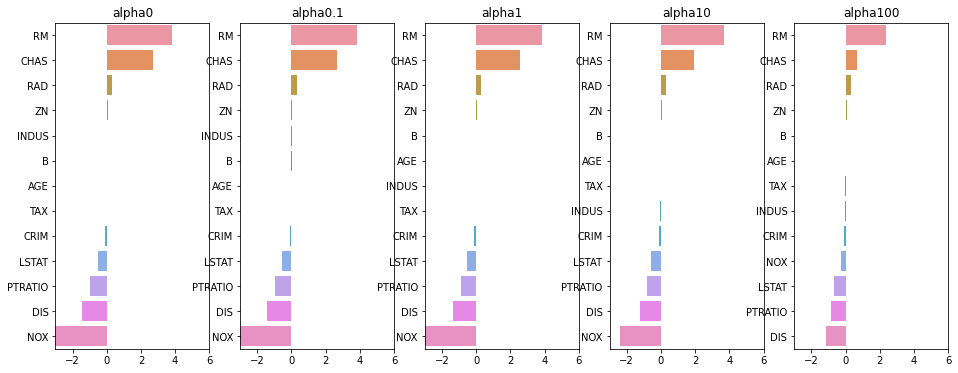

In [36]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

coef_df = pd.DataFrame()
alphas = [0, 0.1, 1, 10, 100]
fig, axs = plt.subplots(figsize=(16, 6), nrows=1, ncols=5)

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X, y)
    colname = 'alpha' + str(alpha)
    coefs = pd.Series(data=ridge.coef_, index=boston.feature_names)
    coef_df[colname] = coefs
    coefs = coefs.sort_values(ascending=False)
    
    # 그래프 그리기
    axs[i].set_title(colname)
    axs[i].set_xlim(-3, 6)
    sns.barplot(x=coefs.values, y=coefs.index, ax=axs[i])

plt.show()

**alpha 값에 따른 컬럼별 회귀계수 출력**

In [37]:
coef_df

,alpha0,alpha0.1,alpha1,alpha10,alpha100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


## 라쏘 회귀(Lasso Regression)

- L1 Norm Reqularization

https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0

### 라쏘 회귀의 특징
- 제약 범위가 각진 형태
- 회귀계수 일부가 0이 되어 변수 선택 기법으로 활용
- 변수 간 상관관계 높은 상황에서 Ridge에 비해 상대적으로 예측 성능이 떨어짐

### 사이킷런의 Lasso 회귀를 위한 클래스

In [47]:
alphas = [0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    lasso = Lasso(alpha)
    neg_mse = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = -1 * neg_mse
    rmse = np.sqrt(mse)
    avg_mse = np.mean(mse)
    avg_rmse = np.mean(rmse)

    print('alpha', alpha)
    print('평균 MSE : {0:.3f}, 평균 RMSE : {1:.3f}'.format(avg_mse, avg_rmse))

alpha 0.07
평균 MSE : 34.895, 평균 RMSE : 5.612
alpha 0.1
평균 MSE : 34.830, 평균 RMSE : 5.615
alpha 0.5
평균 MSE : 34.634, 평균 RMSE : 5.669
alpha 1
평균 MSE : 35.532, 평균 RMSE : 5.776
alpha 3
평균 MSE : 40.611, 평균 RMSE : 6.189


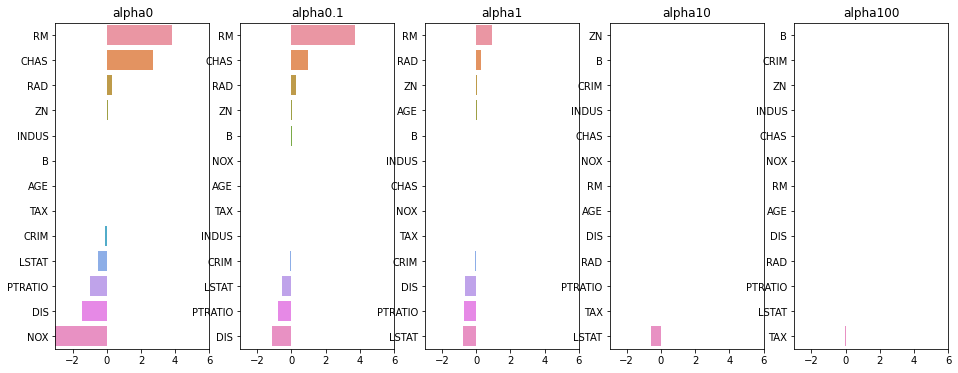

In [48]:
from sklearn.linear_model import Lasso

coef_df = pd.DataFrame()
alphas = [0, 0.1, 1, 10, 100]
fig, axs = plt.subplots(figsize=(16, 6), nrows=1, ncols=5)

for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X, y) # lasso.fit(X_train, y_train)으로 써도 무방
    colname = 'alpha' + str(alpha)
    coefs = pd.Series(data=lasso.coef_, index=boston.feature_names)
    coef_df[colname] = coefs
    coefs = coefs.sort_values(ascending=False)
    
    # 그래프 그리기
    axs[i].set_title(colname)
    axs[i].set_xlim(-3, 6)
    sns.barplot(x=coefs.values, y=coefs.index, ax=axs[i])

plt.show()

In [49]:
coef_df

,alpha0,alpha0.1,alpha1,alpha10,alpha100
CRIM,-0.108011,-0.097894,-0.063437,-0.000000,-0.000000
ZN,0.046420,0.049211,0.049165,0.026146,0.000000
INDUS,0.020559,-0.036619,-0.000000,-0.000000,-0.000000
CHAS,2.686734,0.955190,0.000000,0.000000,0.000000
NOX,-17.766611,-0.000000,-0.000000,0.000000,-0.000000
RM,3.809865,3.703202,0.949811,0.000000,0.000000
AGE,0.000692,-0.010037,0.020910,0.000000,-0.000000
DIS,-1.475567,-1.160538,-0.668790,-0.000000,0.000000
RAD,0.306049,0.274707,0.264206,0.000000,-0.000000
TAX,-0.012335,-0.014570,-0.015212,-0.009282,-0.020972


### 규제가 있는 회귀모델 적용 함수 get_linear_reg_eval() 작성
- 매개변수로 규제회귀 Ridge, Lasso, ElasticNet을 지정하여 해당 규제 모델을 학습하고 에측성능 출력

In [68]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고
# 회귀 계수값들을 DataFrame으로 반환

def get_linear_reg_eval(model_name, params=None, 
                        X_data_n=None, y_target_n=None,
                       verbose=True, return_coeff=True):
    
    coef_df = pd.DataFrame()
    
    if verbose:
        print('######', model_name, '######')
    
    for param in params:
        if model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        new_mse = cross_val_score(model, X_data_n, y_target_n,
                                 scoring='neg_mean_squared_error', cv=5)
        avg_mse = np.mean(-1*new_mse)
        avg_rmse = np.mean(np.sqrt(-1*new_mse))
        
        print('alpha {0}일 때 5폴드세트 평균 MSE: {1:.3f}, 평균 RMSE: {2:.3f}'.format(param, avg_mse, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coefs = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha' + str(param)
            coef_df[colname] = coefs
            
    return coef_df

**alpha값을 0.07, 0.1, 0.5, 1.3으로 지정한 경우 라쏘모델의 성능 평가**

In [69]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
ridge_alphas = [0, 0.1, 1, 10, 100]

boston_df = pd.DataFrame(data=X, columns=boston.feature_names)
boston_df['PRICE'] = y

y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE', axis=1)

coef_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, 
                                    X_data_n=X_data, y_target_n=y)

coef_ridge_df = get_linear_reg_eval('Ridge', params=ridge_alphas, 
                                    X_data_n=X_data, y_target_n=y)

# 나머지 인수는 디폴트 값으로 사용

###### Lasso ######
alpha 0.07일 때 5폴드세트 평균 MSE: 34.895, 평균 RMSE: 5.612
alpha 0.1일 때 5폴드세트 평균 MSE: 34.830, 평균 RMSE: 5.615
alpha 0.5일 때 5폴드세트 평균 MSE: 34.634, 평균 RMSE: 5.669
alpha 1일 때 5폴드세트 평균 MSE: 35.532, 평균 RMSE: 5.776
alpha 3일 때 5폴드세트 평균 MSE: 40.611, 평균 RMSE: 6.189
###### Ridge ######
alpha 0일 때 5폴드세트 평균 MSE: 37.132, 평균 RMSE: 5.829
alpha 0.1일 때 5폴드세트 평균 MSE: 36.707, 평균 RMSE: 5.788
alpha 1일 때 5폴드세트 평균 MSE: 35.267, 평균 RMSE: 5.653
alpha 10일 때 5폴드세트 평균 MSE: 33.395, 평균 RMSE: 5.518
alpha 100일 때 5폴드세트 평균 MSE: 29.906, 평균 RMSE: 5.330


=> alpha가 0.07일 때, 가장 좋은 평균 RMSE를 보여주나, 릿지 경우보다 약간 떨어짐

**alpha값에 따른 피처별 회귀 계수**

In [70]:
coef_lasso_df

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


In [71]:
coef_ridge_df

,alpha0,alpha0.1,alpha1,alpha10,alpha100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


## 엘라스틱넷 회귀(ElasticNet Regression)

- L1과 L2 규제를 결합한 회귀


- 비용함수목표 = $RSS(W) + alpha2*||W||_2^2 + alpha1*||W||_1 $


- 수행시간이 오래걸리는 단점이 있음


### 사이킷런의 엘라스틱넷 회귀 클래스 `ElasticNet`

**ElasticNet의 주요 파라미터**

엘라스틱넷의 규제는 $a*L1 + b*L2$로 정의

(여기서 a는 L1규제의 alpha값, b는 L2규제의 alpha 값)

- alpha : a+b
- l1_ratio : a/(a+b)
    - l1_ratio가 0이면 a가 0이므로 L2 규제와 동일
    - l1_ratio가 1이면 b가 0이므로 L1 규제와 동일

**엘라스틱넷에 사용될 alpha값을 변화시키면서 성능평가**

In [74]:
# 엘라스틱넷에서 사용될 alpha 파라미터의 값들을 정의
# 앞에서 작성한 get_linear_reg_eval() 함수 호출
# 이 함수에서 l1_ratio는 0.7로 고정되어 있음

elastic_alphas=[0.07, 0.1, 0.5, 1, 3]
coef_elastic_df = get_linear_reg_eval('ElasticNet', elastic_alphas, 
                                       X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07일 때 5폴드세트 평균 MSE: 33.673, 평균 RMSE: 5.542
alpha 0.1일 때 5폴드세트 평균 MSE: 33.318, 평균 RMSE: 5.526
alpha 0.5일 때 5폴드세트 평균 MSE: 31.618, 평균 RMSE: 5.467
alpha 1일 때 5폴드세트 평균 MSE: 33.090, 평균 RMSE: 5.597
alpha 3일 때 5폴드세트 평균 MSE: 39.025, 평균 RMSE: 6.068


=> alpha가 0.5일때 가장 좋은 예측성능을 보임

In [77]:
# 반환된 coef_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame 출력
coef_elastic_df

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


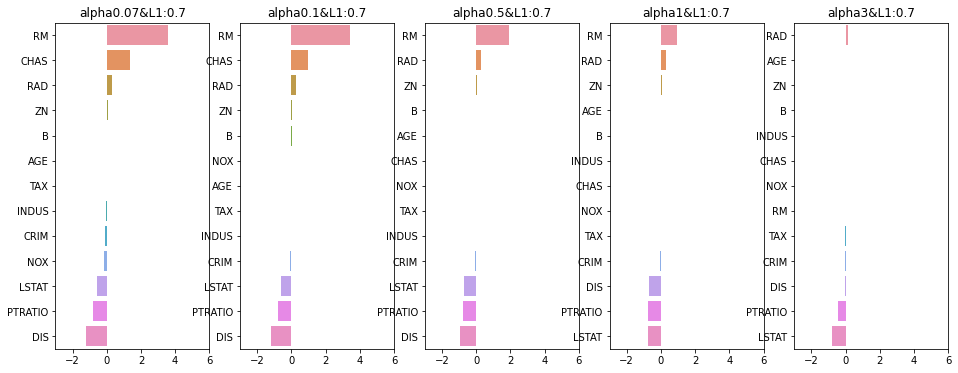

In [81]:
fig, axs = plt.subplots(figsize=(16, 6), nrows=1, ncols=5)

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

for i, alpha in enumerate(elastic_alphas):
    colname = 'alpha' + str(alpha)
    coefs = coef_elastic_df[colname].sort_values(ascending=False)
    
    # 그래프 그리기
    axs[i].set_title(colname+'&L1:0.7')
    axs[i].set_xlim(-3, 6)
    sns.barplot(x=coefs.values, y=coefs.index, ax=axs[i])
    
plt.show()

## 선형 회귀 모델을 위한 데이터 변환

* 선형회귀모델의 가정
    - 가정: 선형성 (X와 y), 오차의 정규성, 독립성, 등분산성
* 피처들(X)이나 타깃(y)의 분포가 정규분포 형태인 것을 선호
* 중요 피처들이나 타깃값의 부포도가 심하게 비대칭인 경우
    - 선형회귀모델을 적용하기 위해 데이터에 대한 변환 작업 진행이 일반적
    
    
**피처들(X)의 변환**
1. 표준화 : StandardScaler 클래스
2. 정규화 : MinMaxScaler 클래스
3. 스케일링/정규화를 수행한 데이터세트에 다시 다항특성을 적용하여 반환
    - 스케일링/정규화를 했으나 예측 성능에 향상이 없는 경우
4. 비대칭분포(오른쪽으로 꼬리가 긴 분포)의 경우 로그 변환


**타깃(y) 값 변환**

1. StandardScaler 클래스


2. MinMaxScaler 클래스


3. 스케일링/정규화를 수행한 데이터세트에 다시 다항특성을 적용하여 변환
    - 스케일링/정규화를 했으나 예측성능에 향상이 없을 경우
    
    
4. 비대칭분포(오른쪽으로 꼬리가 긴 분포)의 경우 로그 변환

**데이터변환을 위한 함수 get_scaled_data() 작성**

In [82]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

**보스톤 주택가격데이터**

:Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출

In [87]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출 

alphas = [0.1, 1, 10, 100]

# 변환 방법은 모두 6개, 
# 1. 원자료
# 2. 표준정규분포 (StandardScaler)
# 3. 표준정규분포+다항식 특성
# 4. 최대/최소 정규화
# 5. 최대/최소 정규화+다항식 특성
# 6. 로그변환 

scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                 ('MinMax', None), ('MinMax', 2), ('Log', None)]

for method in scale_methods:
    X_scaled = get_scaled_data(method=method[0], p_degree=method[1],
                              input_data=X_data)
    print(X_scaled.shape, X_data.shape)
    print('## 변환 유형 : {0}, Polynomial Degree: {1}'.format(method[0], method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_scaled,
                       y_target_n = y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)
## 변환 유형 : None, Polynomial Degree: None
alpha 0.1일 때 5폴드세트 평균 MSE: 36.707, 평균 RMSE: 5.788
alpha 1일 때 5폴드세트 평균 MSE: 35.267, 평균 RMSE: 5.653
alpha 10일 때 5폴드세트 평균 MSE: 33.395, 평균 RMSE: 5.518
alpha 100일 때 5폴드세트 평균 MSE: 29.906, 평균 RMSE: 5.330
(506, 13) (506, 13)
## 변환 유형 : Standard, Polynomial Degree: None
alpha 0.1일 때 5폴드세트 평균 MSE: 37.102, 평균 RMSE: 5.826
alpha 1일 때 5폴드세트 평균 MSE: 36.842, 평균 RMSE: 5.803
alpha 10일 때 5폴드세트 평균 MSE: 34.999, 평균 RMSE: 5.637
alpha 100일 때 5폴드세트 평균 MSE: 32.342, 평균 RMSE: 5.421
(506, 104) (506, 13)
## 변환 유형 : Standard, Polynomial Degree: 2
alpha 0.1일 때 5폴드세트 평균 MSE: 96.003, 평균 RMSE: 8.827
alpha 1일 때 5폴드세트 평균 MSE: 54.610, 평균 RMSE: 6.871
alpha 10일 때 5폴드세트 평균 MSE: 32.367, 평균 RMSE: 5.485
alpha 100일 때 5폴드세트 평균 MSE: 23.531, 평균 RMSE: 4.634
(506, 13) (506, 13)
## 변환 유형 : MinMax, Polynomial Degree: None
alpha 0.1일 때 5폴드세트 평균 MSE: 36.293, 평균 RMSE: 5.764
alpha 1일 때 5폴드세트 평균 MSE: 32.539, 평균 RMSE: 5.465
alpha 10일 때 5폴드세트 평균 MSE: 35.795, 평균 RMSE: 5.754
alpha 100일